In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

load the data

In [2]:
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
pd.set_option('display.max_rows', None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


## Cleaning

Check for mising data

In [6]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [7]:
for col in df.columns:
    pct = np.mean(df[col].isnull())
    print('{} = {}%'.format(col, pct))

name = 0.0%
rating = 0.010041731872717789%
genre = 0.0%
year = 0.0%
released = 0.0002608242044861763%
score = 0.0003912363067292645%
votes = 0.0003912363067292645%
director = 0.0%
writer = 0.0003912363067292645%
star = 0.00013041210224308815%
country = 0.0003912363067292645%
budget = 0.2831246739697444%
gross = 0.02464788732394366%
company = 0.002217005738132499%
runtime = 0.0005216484089723526%


Since there low percentages of missing values, these missing values can be dropped without having a significant impact on the analysis.

In [8]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


Check for datatypes

In [9]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
#change datatypes
df.budget = df['budget'].astype('int64')
df.gross = df['gross'].astype('int64')
df.votes = df['votes'].astype('int64')
df.runtime = df['runtime'].astype('int64')

In [11]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104


There are discrepancies between the year on the release column and the year column. To resolve this, split the released column and drop the year column.

In [12]:
year_split = lambda x: x.split(',')[-1]
df['released_year'] = df['released'].apply(year_split).str[:5]

In [13]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980


In [14]:
df.columns
df= df.drop(['year', 'released'], axis= 1)
df.head(2)

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980


check for duplicates

In [15]:
df.duplicated().sum()

0

Add extra column to show if movie was profitable or not.

In [16]:
profit = lambda row: 'Profitable' if row['budget'] < row['gross'] else 'Not Profitable'
df['is_profitable'] = df.apply(profit, axis= 1)

In [17]:
df.head(2)

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,is_profitable
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980,Profitable
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980,Profitable


Sort values

In [18]:
df = df.sort_values(by= 'gross', ascending= False)

In [19]:
df.head(5)

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,is_profitable
5445,Avatar,PG-13,Action,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009,Profitable
7445,Avengers: Endgame,PG-13,Action,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019,Profitable
3045,Titanic,PG-13,Drama,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997,Profitable
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015,Profitable
7244,Avengers: Infinity War,PG-13,Action,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018,Profitable


array([[<AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'votes'}>],
       [<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'gross'}>],
       [<AxesSubplot:title={'center':'runtime'}>, <AxesSubplot:>]],
      dtype=object)

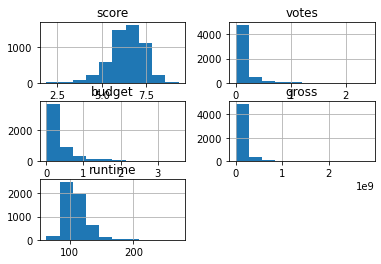

In [20]:
df.hist()

 ## Visualisations

The purpose of these visualisations is to show correlation between different factors such as budget, company, country, ratings, runtime, genre and the gross/profit of a movie.

In [21]:
df.corr()

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


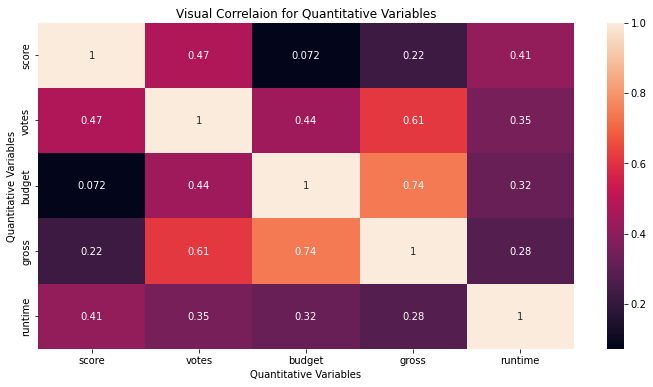

In [22]:
#Visualise the correlation so as to know what to expect in the individual visualisations.
def label(title, x, y):
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    
correlation = df.corr()
plt.figure(figsize= (12,6))
sns.heatmap(correlation, annot = True)
label('Visual Correlaion for Quantitative Variables', 'Quantitative Variables', 'Quantitative Variables')

In [23]:
correlation_pairs = correlation.unstack()
correlation_pairs

score    score      1.000000
         votes      0.474256
         budget     0.072001
         gross      0.222556
         runtime    0.414068
votes    score      0.474256
         votes      1.000000
         budget     0.439675
         gross      0.614751
         runtime    0.352303
budget   score      0.072001
         votes      0.439675
         budget     1.000000
         gross      0.740247
         runtime    0.318695
gross    score      0.222556
         votes      0.614751
         budget     0.740247
         gross      1.000000
         runtime    0.275796
runtime  score      0.414068
         votes      0.352303
         budget     0.318695
         gross      0.275796
         runtime    1.000000
dtype: float64

In [24]:
sorted_pairs = correlation_pairs.sort_values()
high_correlation_pairs = sorted_pairs[sorted_pairs > 0.5]
high_correlation_pairs

gross    votes      0.614751
votes    gross      0.614751
budget   gross      0.740247
gross    budget     0.740247
score    score      1.000000
budget   budget     1.000000
votes    votes      1.000000
gross    gross      1.000000
runtime  runtime    1.000000
dtype: float64

This shows that votes, movie budgets have high correlation with gross earnings.

#### Correlation of Categorical Variables and Gross Earning

In [25]:
#Create a copy of the original dataframe
df_copy = df.copy()

In [26]:
# Convert the categorical variables to categorical codes.
for cols in df_copy.columns:
    if df_copy[cols].dtype == 'object':
        df_copy[cols] = df_copy[cols].astype('category')
        df_copy[cols] = df_copy[cols].cat.codes

In [27]:
df_copy.head(5)

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,is_profitable
5445,386,5,0,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,29,1
7445,388,5,0,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,39,1
3045,4909,5,6,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,17,1
6663,3643,5,0,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,35,1
7244,389,5,0,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,38,1


In [28]:
# drop columns not needed for visualisation to prevent a cumbersome viz.
drop_columns = []
for columns in df_copy.columns:
    if df[columns].dtype != 'object':
        drop_columns.append(columns)
drop_columns.remove('gross')
df_copy= df_copy.drop(drop_columns, axis= 1)


In [29]:
correlation_matrix = df_copy.corr()
correlation_matrix

,name,rating,genre,director,writer,star,country,gross,company,released_year,is_profitable
name,1.000000,-0.029234,0.010996,0.015246,0.012880,-0.006882,-0.025490,0.005639,0.021697,0.023553,-0.015218
rating,-0.029234,1.000000,0.147796,0.014656,-0.003149,0.009196,0.008230,-0.181906,-0.092357,0.024610,-0.078201
genre,0.010996,0.147796,1.000000,-0.008553,0.017578,0.003341,-0.009164,-0.244101,-0.071334,-0.059834,-0.058020
director,0.015246,0.014656,-0.008553,1.000000,0.261735,0.036593,0.011133,-0.029560,-0.008223,-0.036288,-0.020452
writer,0.012880,-0.003149,0.017578,0.261735,1.000000,0.018520,0.022488,-0.035885,-0.003697,-0.024382,-0.010621
star,-0.006882,0.009196,0.003341,0.036593,0.018520,1.000000,-0.009990,-0.000004,0.014082,-0.034821,-0.014717
country,-0.025490,0.008230,-0.009164,0.011133,0.022488,-0.009990,1.000000,0.060078,0.048569,-0.074788,0.070519
gross,0.005639,-0.181906,-0.244101,-0.029560,-0.035885,-0.000004,0.060078,1.000000,0.149553,0.262778,0.331004
company,0.021697,-0.092357,-0.071334,-0.008223,-0.003697,0.014082,0.048569,0.149553,1.000000,-0.023596,0.082449
released_year,0.023553,0.024610,-0.059834,-0.036288,-0.024382,-0.034821,-0.074788,0.262778,-0.023596,1.000000,0.158884


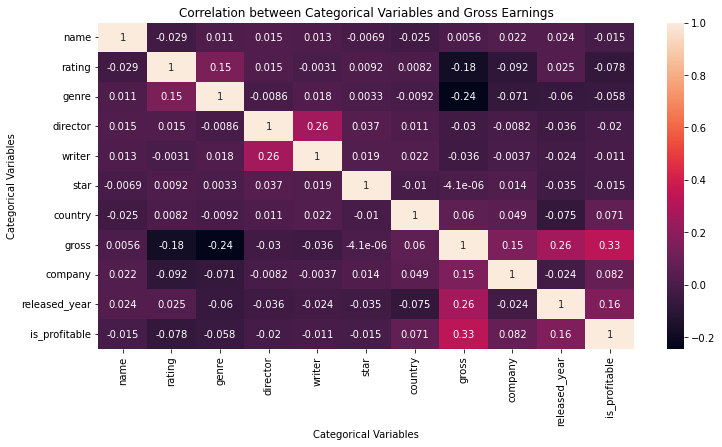

In [30]:
plt.figure(figsize= (12,6))
sns.heatmap(correlation_matrix, annot= True)
label('Correlation between Categorical Variables and Gross Earnings', 'Categorical Variables', 'Categorical Variables')

#### Budget and Gross 

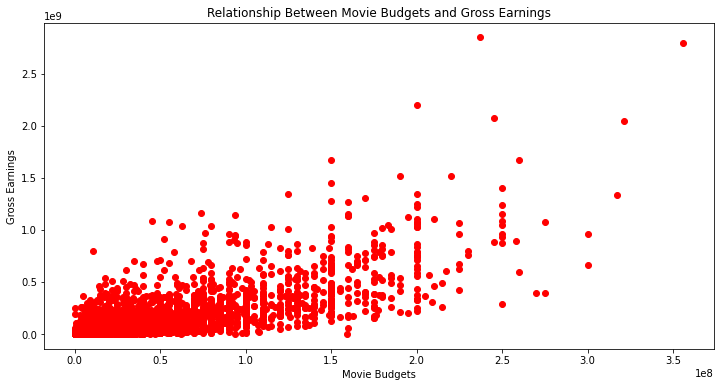

In [31]:
plt.figure(figsize= (12,6))
plt.scatter(x=df['budget'], y = df['gross'], color= 'red')
label('Relationship Between Movie Budgets and Gross Earnings', 'Movie Budgets', 'Gross Earnings')

<AxesSubplot:xlabel='budget', ylabel='gross'>

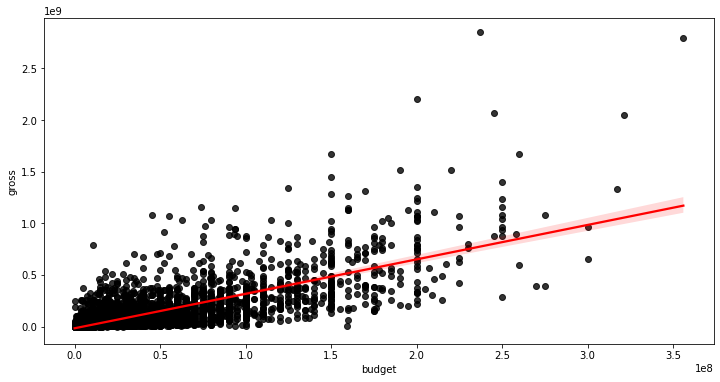

In [32]:
#plot budget vs gross using seaborn
plt.figure(figsize = (12,6))
sns.regplot(x= 'budget', y= 'gross', data= df, scatter_kws= {'color': 'black'}, line_kws={'color' : 'red'})

The regression line shows positive correlation between budget and gross earnings.
Correlation between budget and gross is +0.74 which is very good correlation.

#### Votes and Gross

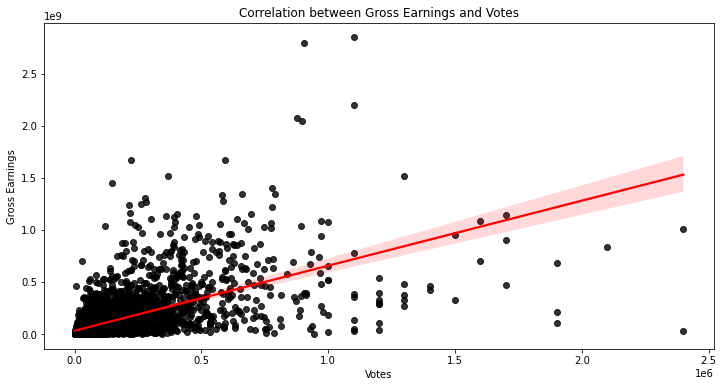

In [33]:
#plot budget vs gross using seaborn
plt.figure(figsize = (12,6))
sns.regplot(x= 'votes', y= 'gross', data= df, scatter_kws= {'color': 'black'}, line_kws={'color' : 'red'})
label('Correlation between Gross Earnings and Votes', 'Votes', 'Gross Earnings')

This also confirms the strong correlation between Gross earnings and mbovie votes.

#### Profitable vs Not Profitable Movies

In [34]:
df.head(2)

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,is_profitable
5445,Avatar,PG-13,Action,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009,Profitable
7445,Avengers: Endgame,PG-13,Action,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019,Profitable


In [35]:
profitable = df.groupby('is_profitable').genre.count().reset_index()
profitable

,is_profitable,genre
0,Not Profitable,1744
1,Profitable,3677


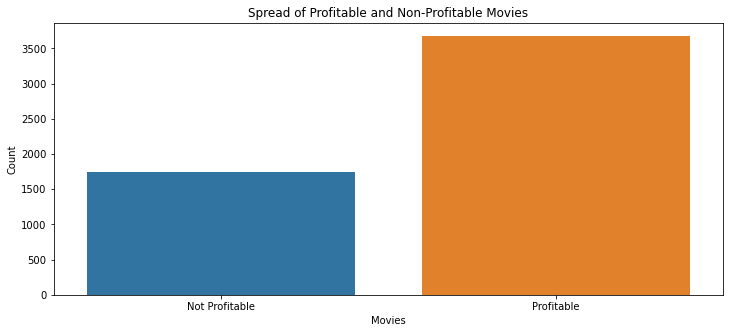

In [36]:
plt.figure(figsize= (12,5))
sns.barplot(x= 'is_profitable', y= 'genre', data = profitable)
label('Spread of Profitable and Non-Profitable Movies', 'Movies', 'Count')

#### Genre and Gross Earnings

In [37]:
genre_group = df.groupby('genre').gross.mean().reset_index()
genre_group = genre_group.sort_values(by= 'gross', ascending= False)
genre_group

,genre,gross
7,Family,5.185831e+08
2,Animation,2.811044e+08
0,Action,1.680232e+08
1,Adventure,1.332682e+08
10,Mystery,1.178877e+08
3,Biography,6.139527e+07
6,Drama,6.036914e+07
4,Comedy,5.916766e+07
9,Horror,5.681695e+07
5,Crime,5.016958e+07


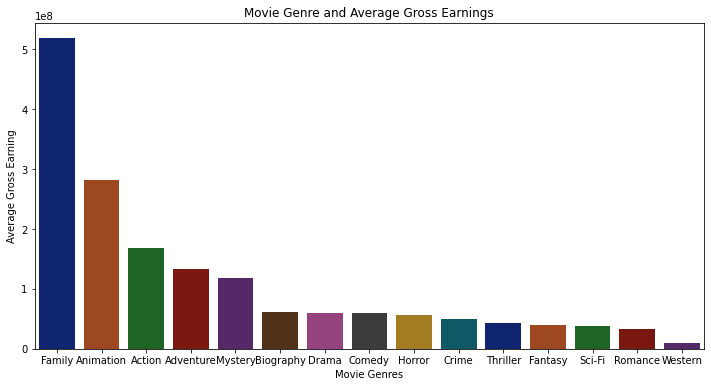

In [38]:
plt.figure(figsize= (12,6))
sns.barplot(x= 'genre', y= 'gross', data= genre_group, palette= 'dark')
label('Movie Genre and Average Gross Earnings', 'Movie Genres', 'Average Gross Earning')

This viz shows that movies that are in the Family genre generate the most gross earnings, followed by Animation and Action movies.